In [1]:
! pip install pandas
! pip install scikit-learn
! pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [3]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [5]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [6]:
y.mean()

np.float64(2.068558169089147)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
ml_est = RandomForestRegressor()

In [9]:
ml_est.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
yhat_train = ml_est.predict(X_train)

In [11]:
mean_absolute_error(y_train, yhat_train)

0.1205356391048938

In [12]:
yhat_test = ml_est.predict(X_test)

In [13]:
mean_absolute_error(y_test, yhat_test)

0.322037976647287

profile plots of correlation to target

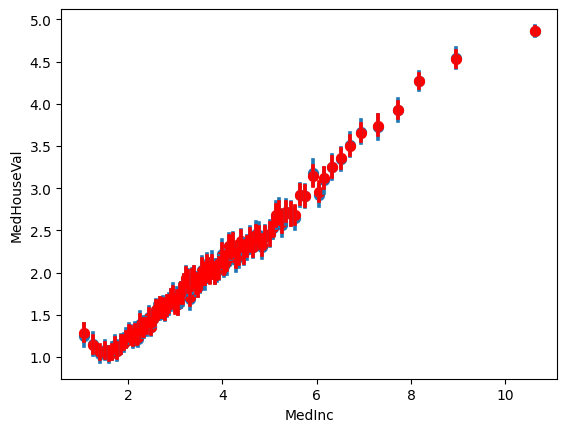

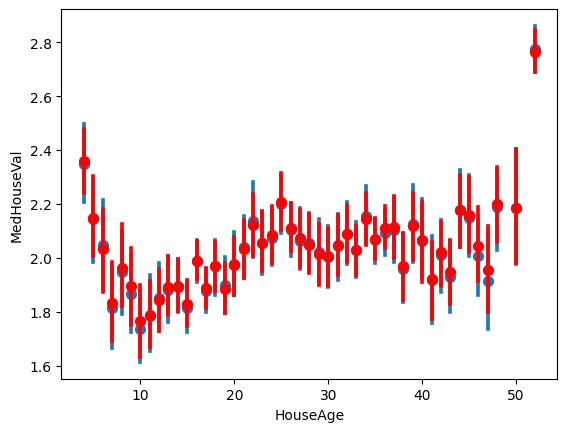

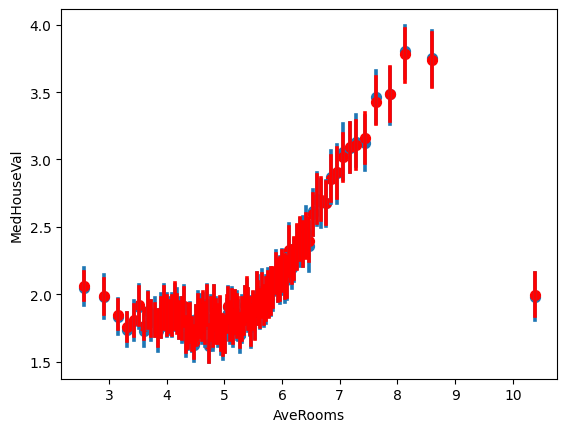

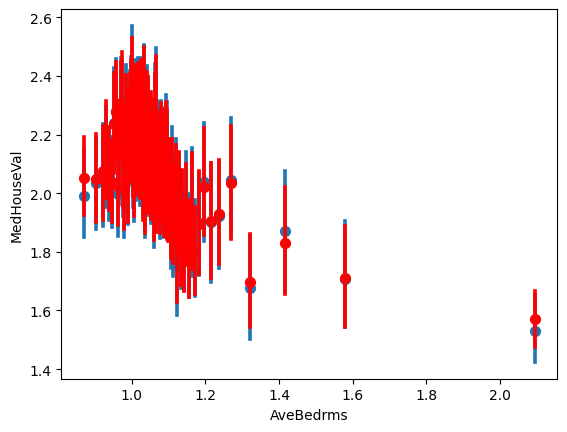

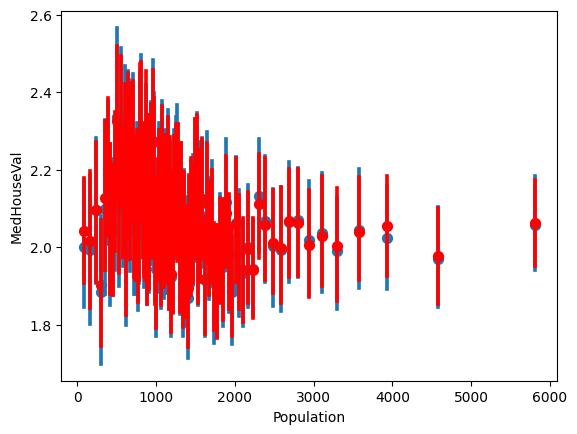

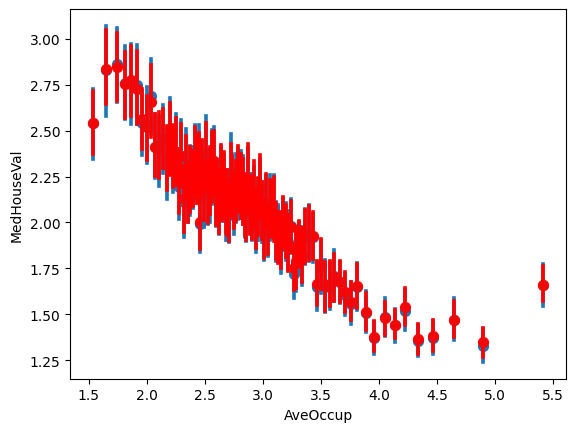

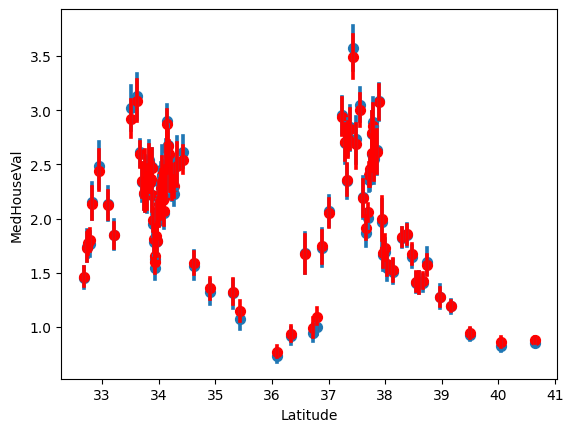

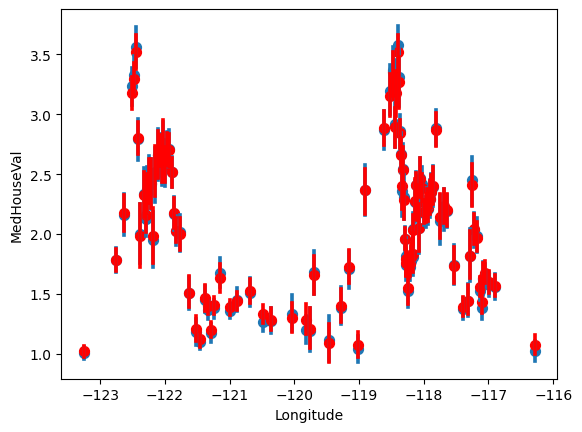

In [14]:
for feature in X_train.columns:
    sns.regplot(x=X_train[feature], y=y_train, x_bins=100, fit_reg=None)
    sns.regplot(x=X_train[feature], y=yhat_train, x_bins=100, fit_reg=None, color="red")
    plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

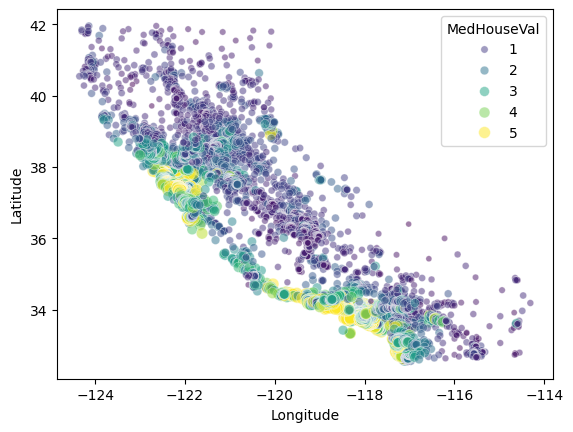

In [15]:
X["MedHouseVal"] = y
sns.scatterplot(
    data=X,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)

try another method (less overfitting)

In [16]:
ml_est = HistGradientBoostingRegressor()

# just to avoid a joblib warning
import os
os.environ['OMP_NUM_THREADS'] = '1'

ml_est.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [17]:
yhat_train = ml_est.predict(X_train)
mean_absolute_error(y_train, yhat_train)

0.27479687675610437

In [18]:
yhat_test = ml_est.predict(X_test)
mean_absolute_error(y_test, yhat_test)

0.30567587551397785